In [56]:
import pandas as od
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [57]:
(X_train , y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [58]:
y_train.shape

(50000, 1)

In [59]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [60]:
X_train.shape

(50000, 32, 32, 3)

In [61]:
X_test.shape

(10000, 32, 32, 3)

In [62]:
# Not normalizing
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [63]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [64]:
def plotSample(X, y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

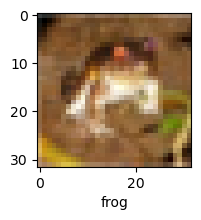

In [65]:
plotSample(X_train, y_train, 0)

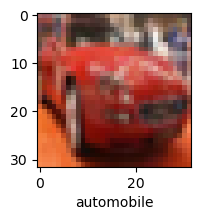

In [66]:
plotSample(X_train, y_train, 5)

In [67]:
# Normalizing data 

X_train = X_train / 255
X_test = X_test / 255

In [68]:
# Building a simple ANN

ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "sigmoid")
])
ann.compile(
    optimizer = "SGD",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 134s 86ms/step - loss: 1.8107 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 132s 85ms/step - loss: 1.6238 - accuracy: 0.4287
Epoch 3/5
1563/1563 [==============================] - 130s 83ms/step - loss: 1.5396 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4806 - accuracy: 0.4764
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4307 - accuracy: 0.4935


In [69]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.5125 - accuracy: 0.4603


[1.5125102996826172, 0.4602999985218048]

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report\n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 4s 12ms/step
Classification report
               precision    recall  f1-score   support

           0       0.72      0.32      0.44      1000
           1       0.49      0.76      0.59      1000
           2       0.31      0.46      0.37      1000
           3       0.41      0.23      0.29      1000
           4       0.37      0.49      0.42      1000
           5       0.53      0.22      0.31      1000
           6       0.42      0.67      0.52      1000
           7       0.73      0.34      0.46      1000
           8       0.47      0.75      0.58      1000
           9       0.60      0.38      0.47      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



In [74]:
# Building a model using CNN

# Building a simple ANN

cnn = models.Sequential([
    # cnn layers

    #layer 1
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    #layer 2
    layers.Conv2D(filters = 64, kernel_size=(3, 3), activation = "relu"),
    layers.MaxPooling2D((2, 2)),
    # dense layers
    layers.Flatten(),
    layers.Dense(64, activation = "relu"),
    layers.Dense(10, activation = "softmax")
])
cnn.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 31s 19ms/step - loss: 1.4464 - accuracy: 0.4799
Epoch 2/5
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0999 - accuracy: 0.6163
Epoch 3/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9790 - accuracy: 0.6608
Epoch 4/5
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9015 - accuracy: 0.6886
Epoch 5/5
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8359 - accuracy: 0.7095


In [75]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9398 - accuracy: 0.6740


[0.9397500157356262, 0.6740000247955322]

In [82]:
y_test = y_test.reshape(-1, )

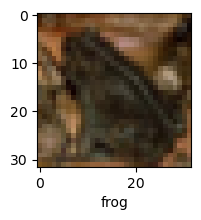

In [90]:
plotSample(X_test, y_test, 30)

In [84]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.7550450e-03, 4.5533930e-03, 8.3565908e-03, 8.1283289e-01,
        1.6891478e-03, 5.2732084e-02, 1.0975617e-01, 2.7385313e-04,
        6.5931170e-03, 4.5771999e-04],
       [2.1936098e-01, 3.9112464e-01, 1.5247928e-03, 6.6104549e-05,
        3.0269445e-04, 1.6345747e-06, 2.3548678e-06, 9.2735054e-06,
        3.8565284e-01, 1.9546992e-03],
       [2.5440115e-01, 3.3881754e-01, 4.0797307e-03, 7.3777172e-03,
        1.2701947e-02, 1.2367136e-03, 9.2227460e-04, 2.8104326e-03,
        2.1286771e-01, 1.6478476e-01],
       [7.8781205e-01, 4.3643720e-02, 3.3526853e-02, 2.0153604e-03,
        8.1938431e-03, 2.3928991e-05, 3.4872020e-04, 7.1973226e-04,
        1.2226268e-01, 1.4530965e-03],
       [3.0053405e-05, 1.5752295e-04, 3.2440782e-02, 7.3848963e-03,
        6.8792409e-01, 4.9671490e-04, 2.7152494e-01, 7.3253123e-06,
        2.1467980e-05, 1.2307009e-05]], dtype=float32)

In [86]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 4]

In [87]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [89]:
classes[y_classes[30]]

'frog'

In [92]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.62      0.81      0.70      1000
           1       0.74      0.84      0.79      1000
           2       0.53      0.60      0.56      1000
           3       0.52      0.46      0.48      1000
           4       0.58      0.70      0.64      1000
           5       0.66      0.47      0.55      1000
           6       0.70      0.81      0.75      1000
           7       0.80      0.69      0.74      1000
           8       0.88      0.65      0.75      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

